In [3]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import importlib
import sys  
sys.path.insert(0, r'C:\Users\ahanks\DoseNet\radwatch-analysis')

In [5]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\ROI.py'>

In [42]:
spec = Spectrum.from_file(r'C:\Users\ahanks\Google Drive\RadWatch\NAA\2019 November\Fish Samples 2019\ucb1901-30min.Spe')

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\NAA\2019 November\Fish Samples 2019\ucb1901-30min.Spe


In [8]:
spec.counts_vals

array([  0.,   0.,   0., ..., 123., 138.,  73.])

In [21]:
spec = spec.combine_bins(8)
spec.bin_edges_raw *= 8

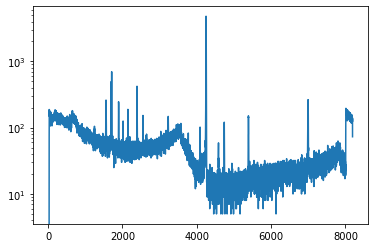

In [43]:
plt.plot(spec.bin_centers_raw, spec.counts_vals)
plt.yscale('log')
plt.show()

In [45]:
kernel = bq.GaussianPeakFilter(4250, 30, fwhm_at_0=10)

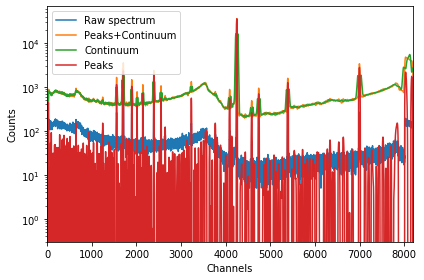

In [46]:
finder = bq.PeakFinder(spec, kernel)

plt.figure()
plt.plot(spec.counts_vals.clip(1e-1), label='Raw spectrum')
plt.plot(finder._peak_plus_bkg.clip(1e-1), label='Peaks+Continuum')
plt.plot(finder._bkg.clip(1e-1), label='Continuum')
plt.plot(finder._signal.clip(1e-1), label='Peaks')
plt.yscale('log')
plt.xlim(0, len(spec))
plt.ylim(3e-1)
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()

[1556.5, 1708.5, 1896.5, 2014.5, 2145.5, 2390.5, 2551.5, 3230.5, 4087.5, 4248.5, 4581.5, 4739.5, 5389.5, 6993.5, 8028.5, 8165.5]
[28.78040124987538, 39.69033246586671, 27.820371001108363, 13.347103825258186, 21.30580264657217, 40.03422006599558, 17.549257559385122, 15.199922835384445, 18.45685591563947, 194.41785622316573, 11.645442054907736, 23.059112618683272, 32.31203855531306, 49.03868224805949, 32.19398610040029, 28.380873368204792]


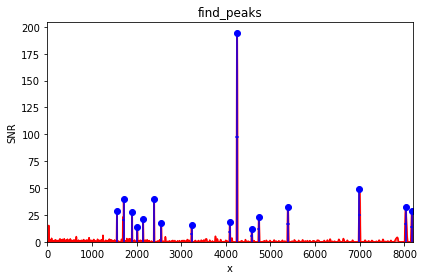

In [47]:
finder.reset()
finder.find_peaks(min_snr=10, xmin=50)
print(finder.channels)
print(finder.snrs)

plt.figure()
plt.title('find_peaks')
finder.plot()
plt.tight_layout()

In [48]:
np.take(spec.bin_edges_kev,finder.channels)

array([ 528.29247183,  578.29385228,  640.13583823,  678.95052094,
        722.04046531,  802.62589662,  855.58016917, 1078.89275808,
       1360.70917292, 1413.64782953, 1523.13736849, 1575.08514294,
       1788.77933248, 2316.00751922, 2656.12969526, 2701.14610969])

In [54]:
import naa_isotope_analyzer as naa
importlib.reload(naa)

<module 'naa_isotope_analyzer' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\naa_isotope_analyzer.py'>

In [ ]:
df = naa.naa_isotope_analyzer('unknownsample.CSV')
df